# ORL PCA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors

import sys
import os
import importlib

sys.path.insert(1, os.path.realpath(os.path.pardir))

import orl as orl
import utils as utils

importlib.reload(utils);
importlib.reload(orl);

import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [2]:
X_train, X_test, y_train, y_test = orl.load_data()
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

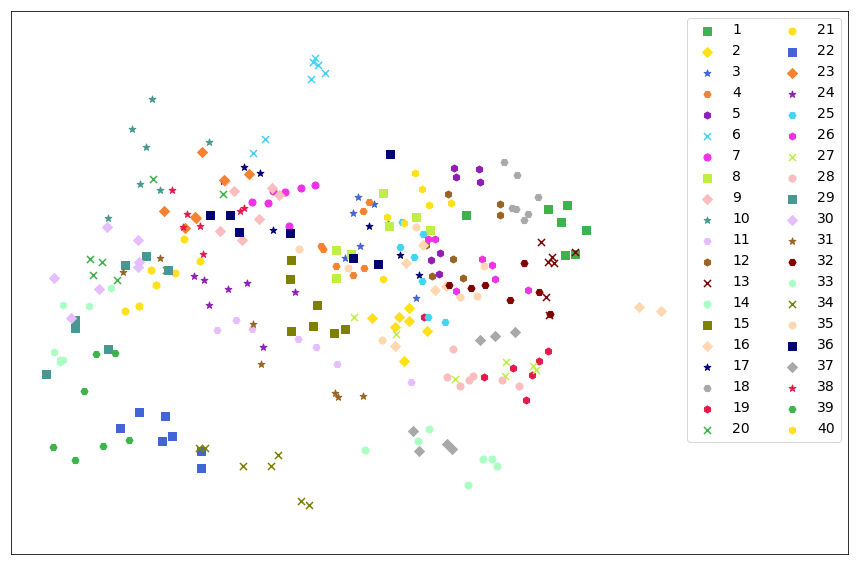

In [3]:
plt.rcParams.update({'font.size': 14})
X_train_2d = PCA(n_components=2).fit_transform(X_train)
X_train_2d.shape
fig, ax = plt.subplots(figsize=(15, 10))
colors = np.tile(['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4',
          '#42d4f4', '#f032e6', '#bfef45', '#fabebe', '#469990', '#e6beff',
          '#9A6324', '#800000', '#aaffc3', '#808000', '#ffd8b1',
          '#000075', '#a9a9a9'], 4)
markers = np.tile(['o', 's', 'D', '*', 'H', 'h', 'x'], 20)

for class_ in np.unique(y_train):
    ix = np.where(y_train == class_)
    ax.scatter(X_train_2d[ix][:,0], X_train_2d[ix][:,1], 
               label=class_, marker=markers[class_], color=colors[class_], s=50)
ax.legend(ncol=2)
ax.set_ylim(-6, 6)
ax.set_xlim(-5, 8)
ax.xaxis.set_tick_params(bottom=False, labelbottom=False)
ax.yaxis.set_tick_params(left=False, labelleft=False)
#ax.axis('off');
fig.savefig('orl_2d_plot.pdf', bbox_inches='tight')

## Cumulative sum of first 60 eigenvalues

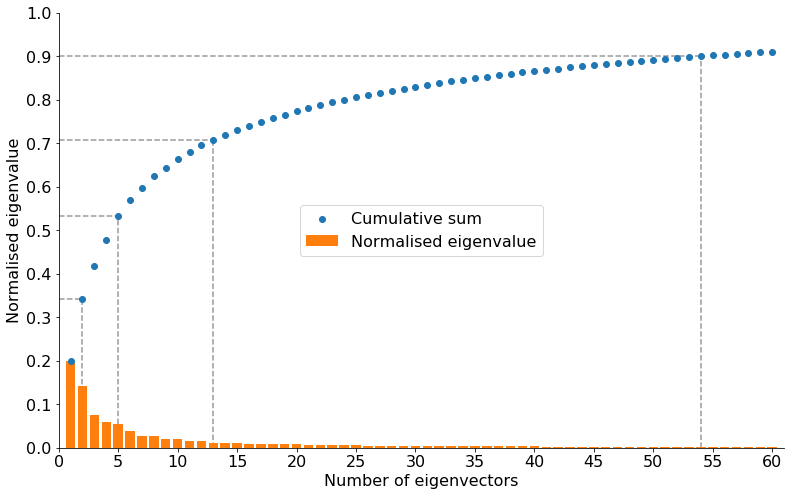

In [4]:
import matplotlib.ticker as ticker

plt.rcParams.update({'font.size': 16})

d = 60
pca = PCA(n_components=d)
pca.fit(X_train)


x_coords = np.arange(1, d+1)
y_coords = pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(figsize=(13, 8))
ax.scatter(x_coords, y_coords, zorder=100, label='Cumulative sum')
ax.bar(x_coords, pca.explained_variance_ratio_, label='Normalised eigenvalue')

idx_50_pct = np.where(y_coords > 0.5)[0][0]
idx_70_pct = np.where(y_coords > 0.7)[0][0]
idx_90_pct = np.where(y_coords > 0.9)[0][0]

x_highlight = x_coords[[1,idx_50_pct, idx_70_pct, idx_90_pct]]
y_highlight = y_coords[[1,idx_50_pct, idx_70_pct, idx_90_pct]]

ax.vlines(x_highlight, 0, y_highlight, linestyles='dashed', color='#999999', zorder=1)
ax.hlines(y_highlight, 0, x_highlight, linestyle='dashed', color='#999999', zorder=2)

ax.legend(loc='center')

ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.set_xlabel('Number of eigenvectors')
ax.set_ylabel('Normalised eigenvalue')
ax.set_xlim(0, 61)
ax.set_ylim(0, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.savefig('orl_cumsum_60_eigvals.pdf', bbox_inches='tight');

In [5]:
y_highlight

array([0.34194409, 0.53247252, 0.70807364, 0.90044063])

In [6]:
x_highlight

array([ 2,  5, 13, 54])